<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
MNIST Problem
</font>
</h1>

First let's get the data from sklearn

In [2]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml("mnist_784", version=1)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
import pandas as pd
import json



df = pd.DataFrame(mnist['data'])
df.to_csv('dataframe.csv', index=False)

# Convert DataFrame and Series objects in the dictionary to a serializable format
def convert_to_serializable(obj):
    if isinstance(obj, pd.DataFrame):
        return obj.to_dict(orient='records')  # convert DataFrame to a list of dictionaries
    elif isinstance(obj, pd.Series):
        return obj.to_dict()  # convert Series to a dictionary
    else:
        return obj

# Apply conversion to the entire dictionary except the 'data' key
data_without_df = {key: convert_to_serializable(value) for key, value in mnist.items() if key != 'data'}

# Save the rest of the dictionary as JSON
with open('data_info.json', 'w') as json_file:
    json.dump(data_without_df, json_file, indent=4)  # indent for pretty printing

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X = X.values.reshape(70000, 784)

In [7]:
import numpy as np

y = y.astype(int)

Let's view one :

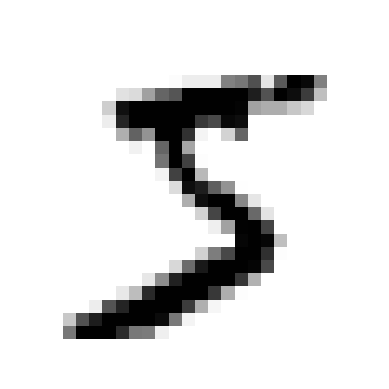

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt


temp = X[0]
temp_image = temp.reshape(28, 28)

plt.imshow(temp_image, cmap="binary")
plt.axis("off")
plt.show()

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

The data set is already shuffled.

Let's break the problem down into a binary classification of finding 5's :

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([temp])

array([ True])

We can see that it works

The main point of these classfications is that there are many different ways to evaluate them, here are some :

<h1 align=Left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Cross Validation
</font>
</h1>

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone



def custom_cross_validator(X_train, y_train_5):
    skfolds = StratifiedKFold(n_splits=3, random_state=42)

    for train_index, test_index in skfolds.split(X_train, y_train_5):
        clone_clf = clone(sgd_clf)
        X_train_folds = X_train[train_index]
        y_train_folds = y_train_5[train_index]
        X_test_fold = X_train[test_index]
        y_test_fold = y_train_5[test_index]


        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        n_correct = sum(y_pred == y_test_fold)
        
        print(n_correct / len(y_pred))

Now let's implement a vanilla 3-Cross validation :

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Well here we have a problem, because of the fact that our data for only 5 is a skewed dataset, even if we decide it at random, we would still have this accuracy, which means that cross validation is not a good idea in these scenario 

<h1 align=Left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Confusion Matrix
</font>
</h1>

In [15]:
from sklearn .model_selection import cross_val_predict


y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Let's see the precision and recall :

In [17]:
from sklearn.metrics import precision_score, recall_score


precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

In [18]:
precision

0.8370879772350012

In [19]:
recall

0.6511713705958311

Now for the F_1 Score :

In [20]:
from sklearn.metrics import f1_score


f1 = f1_score(y_train_5, y_train_pred)

In [21]:
f1

0.7325171197343846

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [23]:
from sklearn.metrics import precision_recall_curve


precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

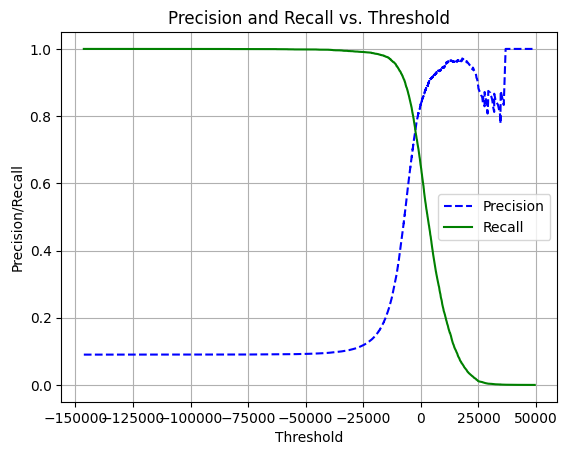

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Precision/Recall")
    plt.title("Precision and Recall vs. Threshold")
    plt.legend()
    plt.grid(True)



plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

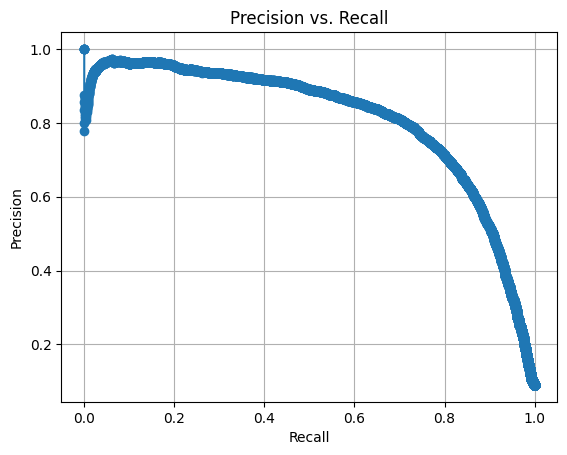

In [25]:
plt.plot(recalls, precisions, marker='o', linestyle='-')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs. Recall")
plt.grid(True)

<h1 align=Left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Receiver Operating Characteristics
</font>
</h1>

In [26]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC curve")
    plt.grid(True)

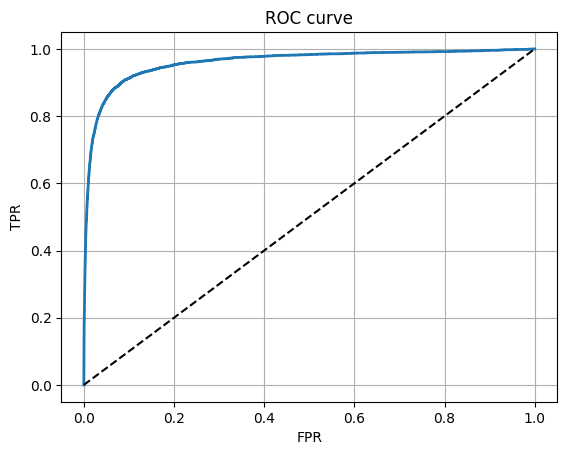

In [28]:
plot_roc_curve(fpr, tpr)
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score


roc_auc_score(y_train_5, y_scores)

0.9604938554008616

So when a TP is rare, in other words, when FP are more important than FN, we use the Percision vs Recall

Otherwise we use the ROC curve

Let's try a Random Forest asweell

In [30]:
from sklearn.ensemble import RandomForestClassifier


forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [31]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

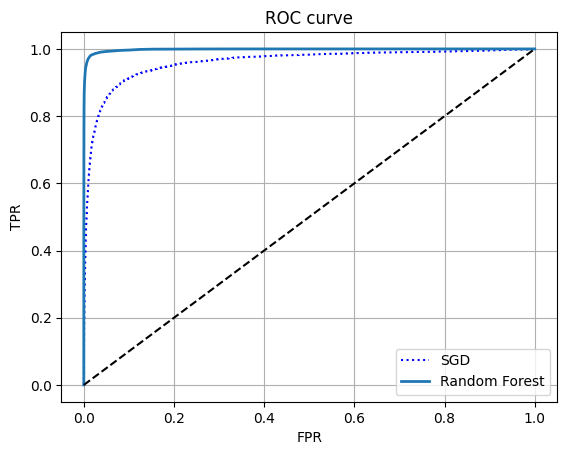

In [32]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [33]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

<h1 align=Left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Multiclass Classifier
</font>
</h1>

Here we could use a OvA, OvR or OVO model's with the prier pipe line's

Let's start seeing them in action :

SVM = Support Vector Machine

In [34]:
from sklearn.svm import SVC


svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [36]:
svm_clf.predict([temp])

array([5])

In [37]:
temp_svm_score = svm_clf.decision_function([temp])

In [38]:
temp_svm_score

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [39]:
np.argmax(temp_svm_score)

5

This is based on OvO

but let's force it to use OvR

In [40]:
from sklearn.multiclass import OneVsRestClassifier


ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([temp])

array([5])

In [41]:
len(ovr_clf.estimators_)

10

So can be done with SGD or Random Forest

In [42]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([temp])

array([3])

In [43]:
sgd_clf.decision_function([temp])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

We can see that only 5 is positive. (3 is as well which raises suspicion)

Let's see how good they are :

In [44]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

Let's see if scalling makes it better :

In [45]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [46]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

Much better!

Let's make this model (sgd_clf) more efficient :

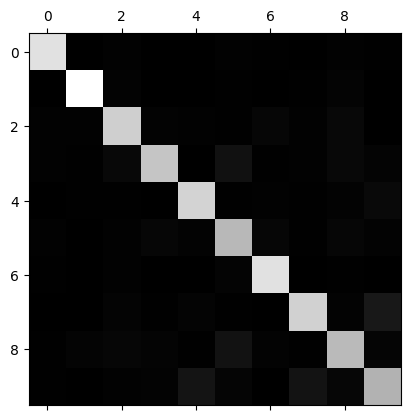

In [47]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Let's see the relative error : (we are kinda zooming on the error's for ADHD sake)

In [48]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

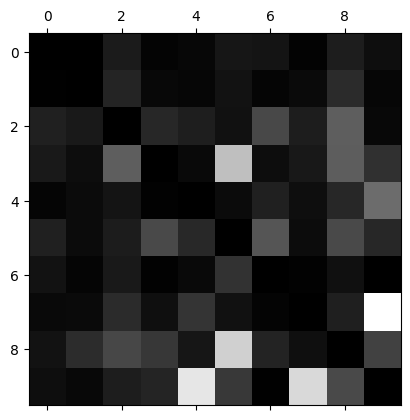

In [49]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

<h1 align=Left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Multilabel Classification
</font>
</h1>

In [50]:
from sklearn.neighbors import KNeighborsClassifier


y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [51]:
knn_clf.predict([temp])

array([[False,  True]])

Let's see how well it does :

In [52]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

Good enough

<h1 align=Left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Multioutput Classification
</font>
</h1>

Let's make a noise cancellation system :

In [54]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

In [55]:
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

In [56]:
y_train_mod = X_train
y_test_mod = X_test

In [57]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()